<a href="https://colab.research.google.com/github/Chiraphinyo001/Mini-project/blob/main/Test_PM_2_5_dust_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("ฝุ่น12 .csv", encoding="tis-620")

In [3]:
df.head()

,จังหวัด,พื้นที่,วันที่,ค่า PM2.5
0,สมุทรสาคร,ต.อ้อมน้อย อ.กระทุ่มแบน,1,26.8
1,สมุทรสาคร,ต.อ้อมน้อย อ.กระทุ่มแบน,2,32.3
2,สมุทรสาคร,ต.อ้อมน้อย อ.กระทุ่มแบน,3,29.6
3,สมุทรสาคร,ต.อ้อมน้อย อ.กระทุ่มแบน,4,24.9
4,สมุทรสาคร,ต.อ้อมน้อย อ.กระทุ่มแบน,5,19.5


In [4]:
df[70:75]

,จังหวัด,พื้นที่,วันที่,ค่า PM2.5
70,สมุทรสาคร,ต.บางโทรัด อ.เมือง จ.สมุทรสาคร,9,11.3
71,สมุทรสาคร,ต.บางโทรัด อ.เมือง จ.สมุทรสาคร,10,17.4
72,สมุทรสาคร,ต.บางโทรัด อ.เมือง จ.สมุทรสาคร,11,12.5
73,สมุทรสาคร,ต.บางโทรัด อ.เมือง จ.สมุทรสาคร,12,NaN
74,สมุทรสาคร,ต.บางโทรัด อ.เมือง จ.สมุทรสาคร,13,NaN


In [5]:
df.notnull().any()

,0
จังหวัด,True
พื้นที่,True
วันที่,True
ค่า PM2.5,True


In [6]:
df.dropna(inplace = True)

In [7]:
df[70:75]

,จังหวัด,พื้นที่,วันที่,ค่า PM2.5
72,สมุทรสาคร,ต.บางโทรัด อ.เมือง จ.สมุทรสาคร,11,12.5
93,ปทุมธานี,ต.คลองหนึ่ง อ.คลองหลวง,1,28.1
94,ปทุมธานี,ต.คลองหนึ่ง อ.คลองหลวง,2,30.8
95,ปทุมธานี,ต.คลองหนึ่ง อ.คลองหลวง,3,23.8
96,ปทุมธานี,ต.คลองหนึ่ง อ.คลองหลวง,4,21.7


In [8]:
df.describe()

,วันที่,ค่า PM2.5
count,164.000000,164.000000
mean,15.371951,15.153232
std,9.107508,6.636032
min,1.000000,4.700000
25%,7.000000,9.350000
50%,15.000000,14.000000
75%,23.000000,19.125000
max,31.000000,36.800000


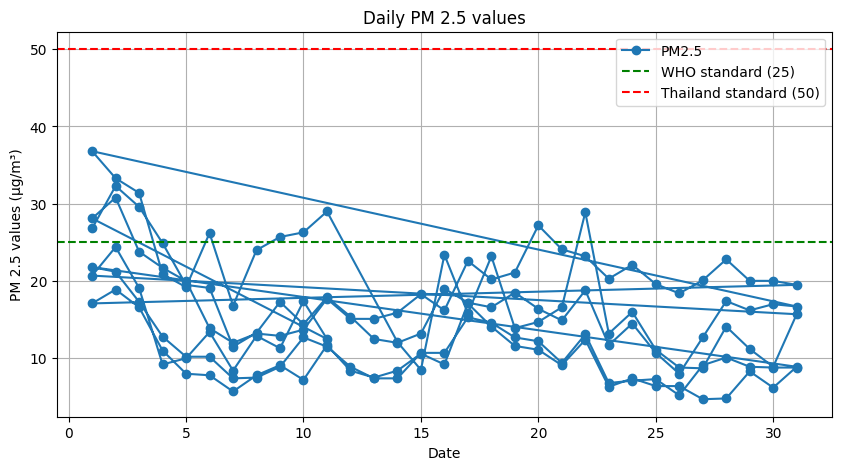

In [23]:
plt.figure(figsize=(10,5))
plt.plot(df["วันที่"], df["ค่า PM2.5"], marker="o", label="PM2.5")

plt.axhline(y=25, color="g", linestyle="--", label="WHO standard (25)")
plt.axhline(y=50, color="r", linestyle="--", label="Thailand standard (50)")

plt.title("Daily PM 2.5 values")
plt.xlabel("Date")
plt.ylabel("PM 2.5 values ​​(µg/m³)")
plt.legend()
plt.grid(True)
plt.show()

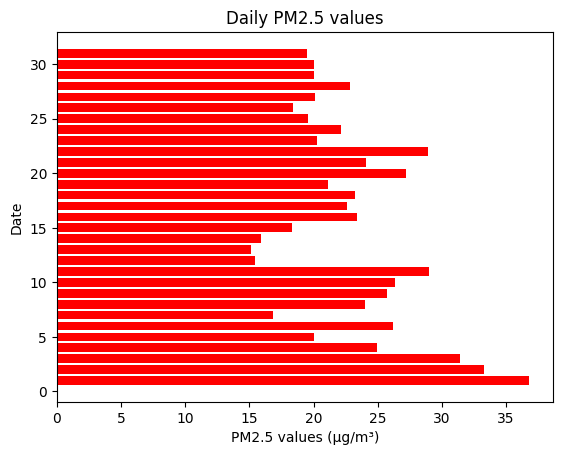

In [10]:
c = ["red"]
plt.barh(df["วันที่"], df["ค่า PM2.5"], label="PM2.5", color=c)
plt.xlabel("PM2.5 values ​​(µg/m³)")
plt.ylabel("Date")
plt.title("Daily PM2.5 values")
plt.show()

     วันที่  ค่า PM2.5  Cluster
0         1       26.8        0
1         2       32.3        0
2         3       29.6        0
3         4       24.9        0
4         5       19.5        2
..      ...        ...      ...
181      27        9.1        1
182      28       10.1        1
183      29        8.9        1
184      30        8.8        1
185      31        8.8        1

[164 rows x 3 columns]


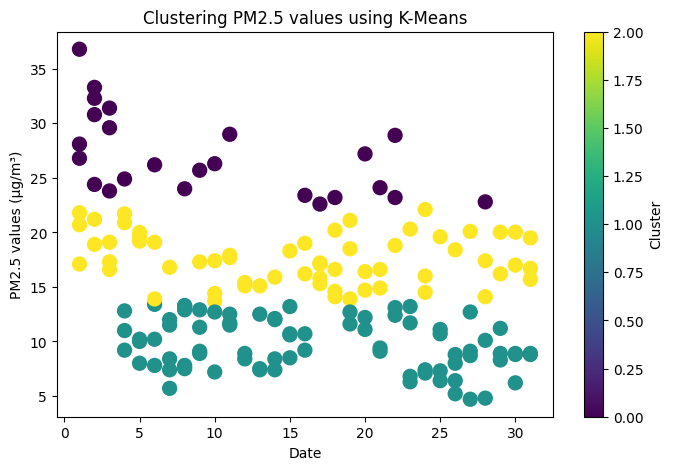

In [13]:
from sklearn.cluster import KMeans
X = df[["ค่า PM2.5"]]

kmeans = KMeans(n_clusters=3, random_state=0)
df["Cluster"] = kmeans.fit_predict(X)

print(df[["วันที่", "ค่า PM2.5", "Cluster"]])

plt.figure(figsize=(8,5))
plt.scatter(df["วันที่"], df["ค่า PM2.5"], c=df["Cluster"], cmap="viridis", s=100)
plt.xlabel("Date")
plt.ylabel("PM2.5 values ​​(µg/m³)")
plt.title("Clustering PM2.5 values ​​using K-Means")
plt.colorbar(label="Cluster")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

def categorize_pm25(x):
    if x <= 25:
        return "Good"
    elif x <= 37:
        return "Moderate"
    elif x <= 50:
        return "Starting to have an impact"
    else:
        return "Have an impact"

df["Category"] = df["ค่า PM2.5"].apply(categorize_pm25)

X = df[["วันที่"]]
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

        Good     0.9146    1.0000    0.9554        75
    Moderate     0.0000    0.0000    0.0000         7

    accuracy                         0.9146        82
   macro avg     0.4573    0.5000    0.4777        82
weighted avg     0.8366    0.9146    0.8739        82



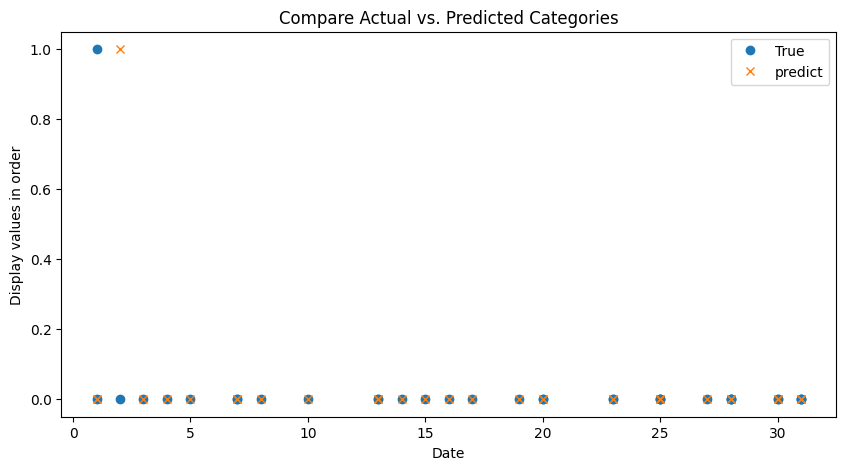

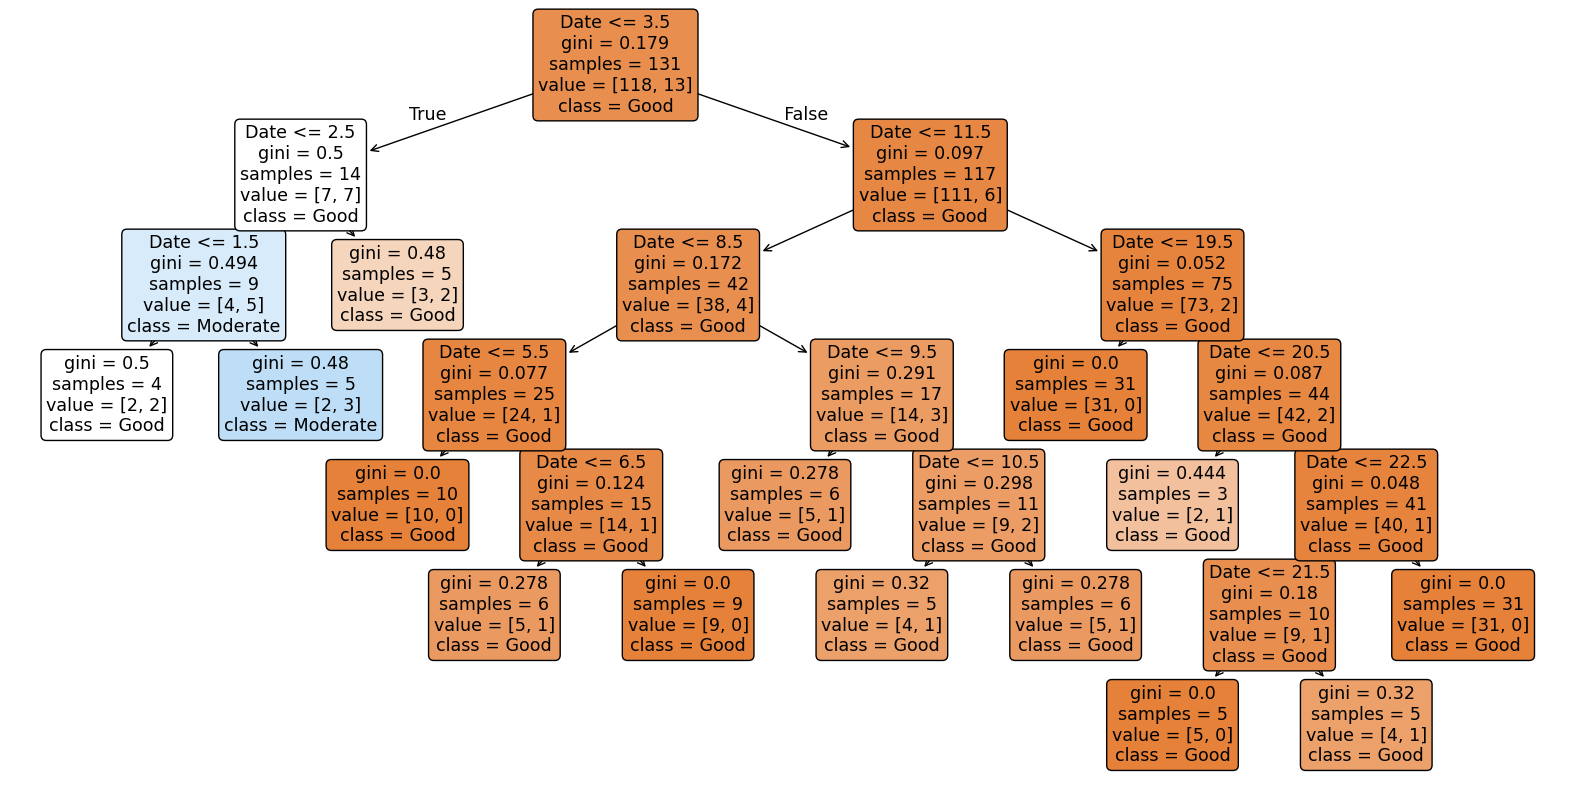

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree
# กราฟเปรียบเทียบค่า PM2.5 จริง vs ทำนาย
plt.figure(figsize=(10,5))
plt.plot(X_test, y_test.map({"Good":0, "Moderate":1, "Starting to have an impact":2, "Have an impact":3}), 'o', label='True')
plt.plot(X_test, pd.Series(y_pred).map({"Good":0, "Moderate":1, "Starting to have an impact":2, "Have an impact":3}), 'x', label='predict')
plt.xlabel('Date')
plt.ylabel('Display values ​​in order')
plt.title('Compare Actual vs. Predicted Categories')
plt.legend()
plt.show()
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=["Date"], class_names=["Good","Moderate","Starting to have an impact","Have an impact"], filled=True, rounded=True)
plt.show()
